# Final Project
Riley Schaefer<br>
12/9/23
***

## Introduction
&emsp;&ensp;In November 2017, Sportsmen's Shooting Center built its first website and in February 2022, I redesigned and reuploaded the website. The public shotgun-only club was built in 1950 and sits on 109 acres in Louisville, OH with skeet, trap, 5-stand, and sporting clays. I was hired to redesign the website to improve its accessibility to information since the original site had too many navigational pages and menu tabs.<br>
&emsp;&ensp;This data analysis attempts to show growth between those two websites. "Site 0" was the original website for Sportsmen's Shooting Center and "Site 1" is the redesigned site. The purpose of this analysis is to show myself and my employers that the work that I have done is causing significant growth of the website and consequently for the club itself. I was inspired to do this as my final project analysis because I saw that in the admin reports on Wix.com, the place that hosts the website, it has automatically collected a lot of data. When I was beginning to take this class and I heard of the final project, my thoughts immediately went to those data sets and I wondered if I could finally understand data analysis enough to do something with them. I could and here we are.<br>
<br>
This is the new updated website, "Site 1":<br>
https://www.sportsmensshootingcenter.com/

In [1]:
import pandas as pd
import requests
import base64
import urllib
from datetime import datetime
import time
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

***
### Gathering Data
&emsp;&ensp;As I mentioned, I got this data from the "Reports" function within Wix.com. Using this function, I can gather the data from both the new and the old websites by setting the data to be from specific dates. I am using this data about each site's traffic because it will tell me valuable information about both sites. For example, the unique visitors would imply new customers and spreading awareness (hence growth) and the number of site sessions means how many people look at the website weekly. The higher these numbers are when compared to the first site, the website is that much more popular than it was.<br>

***
`tr0` stands for `traffic report - site 0` as in the old site.<br>
`tr1` stands for `traffic report - site 1` as in the new site.<br>
***

In [2]:
tr0_data = pd.read_csv("Final Project CSV/traffic-report_site-0.csv")
tr0_data['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr0_data['Date']]
tr0_data.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
225,2017-12-31,124,43,41,53%,"4m, 58s",2.1,"0m, 57s"
224,2018-01-07,149,46,43,50%,"3m, 3s",2.3,"0m, 43s"
223,2018-01-14,186,52,50,38%,"3m, 37s",2.6,"0m, 41s"
222,2018-01-21,354,79,72,38%,"4m, 27s",2.7,"0m, 45s"
221,2018-01-28,245,67,60,33%,"2m, 37s",2.6,"0m, 32s"


In [3]:
tr1_data = pd.read_csv("Final Project CSV/traffic-report_site-1.csv")
tr1_data['Date'] = [datetime.strptime(x, '%b %d, %Y') for x in tr1_data['Date']]
tr1_data.sort_values('Date', ascending = True).head()

,Date,Page views,Site sessions,Unique visitors,Bounce rate,Avg. session duration,Avg. pages per session,Avg. time on page
82,2022-04-24,151,68,53,59%,"4m, 17s",1.6,"1m, 5s"
81,2022-05-01,268,118,96,64%,"6m, 36s",1.5,"1m, 47s"
80,2022-05-08,238,107,78,63%,"8m, 54s",1.5,"1m, 48s"
79,2022-05-15,172,95,77,64%,"3m, 38s",1.3,"1m, 25s"
78,2022-05-22,332,156,113,64%,"10m, 22s",1.4,"2m, 59s"


##### Skewed Data Fix
However, the week of 2022-04-24 is the week that the old site was transferred to the new site. Thus, having significantly decreased data on both site 0 and 1 on that same week, I have removed that week from both data sets.

In [4]:
tr0_df = tr0_data.sort_values('Date', ascending = True).iloc[0:225]
tr1_df = tr1_data.sort_values('Date', ascending = True).iloc[1:83]
tr0 = pd.concat([tr0_df], ignore_index = True)
tr1 = pd.concat([tr1_df], ignore_index = True)

***
`tsr0` stands for `traffic sources report - site 0` as in the old site.<br>
`tsr1` stands for `traffic sources report - site 1` as in the new site.<br>
***

In [5]:
tsr0 = pd.read_csv("Final Project CSV/traffic-sources-report_site-0.csv")
tsr0.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"4,104","16,292","3,270","4m, 29s"
1,Direct,Direct,"2,338","6,445","1,368","3m, 31s"
2,Organic search,Bing,185,793,153,"6m, 31s"
3,Organic search,DuckDuckGo,74,304,68,"4m, 14s"
4,Organic search,Yahoo,76,270,61,"6m, 5s"


In [6]:
tsr1 = pd.read_csv("Final Project CSV/traffic-sources-report_site-1.csv")
tsr1.head()

,Traffic category,Traffic source,Site sessions,Page views,Unique visitors,Avg. session duration
0,Organic search,Google,"6,420","22,035","4,671","5m, 29s"
1,Direct,Direct,"5,810","16,565","2,876","4m, 28s"
2,Organic search,Bing,448,"1,440",313,"5m, 7s"
3,Organic search,DuckDuckGo,209,694,129,"5m, 52s"
4,Organic search,Yahoo,100,284,84,"5m, 46s"


***
### Analysis Plan
&emsp;&ensp;I plan on structuring the data into a Bar Graph and multiple connected-line plots about the site sessions, the page views, and unique visitors between the sites. I also plan to use Bounce rate, Avg. session duration, Avg. pages per session, Avg. time on page, and possibly the traffic sources. All that was needed was to invert the ascending value and convert the time column to something that the system could use. However, the week of 2022-04-24 is the week that the old site was transferred to the new site. Thus, having significantly decreased data on both site 0 and 1 on that same week, I have removed that week from both data sets.<br>
### Y = B<sub>0</sub>X<sub>0</sub> + B<sub>0</sub>X<sub>1</sub> + E

&emsp;&ensp;I am using this data about the traffic of each site because it will tell me valuable information about both sites. For example, the unique visitors would imply new customers and spreading awareness (hence growth) and the number of site sessions means how many people look at the website weekly. The higher these numbers are when compared to the first site, then the website is that much more popular than it was.


Now that I have my data, I can now compile and make comparisons between sites 0 and 1.

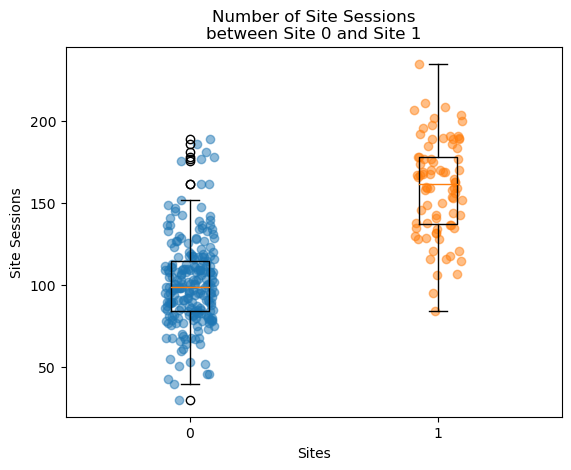

In [7]:
fig1, ax1 = plt.subplots()

tr0_sessions = tr0['Site sessions']
tr1_sessions = tr1['Site sessions']

tr0_xs = [0]*len(tr0_sessions)
tr1_xs = [1]*len(tr1_sessions)
tr0_x_jitter = np.random.uniform(-0.10, 0.10, len(tr0_xs))
tr1_x_jitter = np.random.uniform(-0.10, 0.10, len(tr1_xs))

ax1.boxplot(tr0_sessions, positions = [0])
ax1.boxplot(tr1_sessions, positions = [1])
ax1.scatter(tr0_xs + tr0_x_jitter, tr0_sessions, alpha = 0.5)
ax1.scatter(tr1_xs + tr1_x_jitter, tr1_sessions, alpha = 0.5)

ax1.set_title('Number of Site Sessions\nbetween Site 0 and Site 1')
ax1.set_xlabel('Sites')
ax1.set_ylabel('Site Sessions')

plt.show()

Merge "Site 0" and "Site 1" to a variable for each dataset

In [8]:
pv_tr = pd.concat([tr0["Page views"], tr1["Page views"]] , ignore_index = True)
ss_tr = pd.concat([tr0["Site sessions"], tr1["Site sessions"]] , ignore_index = True)
uv_tr = pd.concat([tr0["Unique visitors"], tr1["Unique visitors"]] , ignore_index = True)
apps_tr = pd.concat([tr0["Avg. pages per session"], tr1["Avg. pages per session"]] , ignore_index = True)

For both "Site 0" & "Site 1" for `'Bounce rate'`:
- Remove the % Character from each "pandas.core.series.Series" --> list
- converts each string in the list into integers 
- convert that list into a 'pandas.core.frame.DataFrame'
- convert that into a 'pandas.core.series.Series'

Then, concatenate both "Site 0" and "Site 1" together 

In [9]:
tr0_br_list = [x.strip('%') for x in tr0["Bounce rate"]]
tr0_br_int_list = [eval(i) for i in tr0_br_list]
tr0_br_df = pd.DataFrame(tr0_br_int_list)
tr0_br = tr0_br_df.squeeze()

tr1_br_list = [x.strip('%') for x in tr1["Bounce rate"]]
tr1_br_int_list = [eval(i) for i in tr1_br_list]
tr1_br_df = pd.DataFrame(tr1_br_int_list)
tr1_br = tr1_br_df.squeeze()

br_df = pd.concat([tr0_br, tr1_br] , ignore_index = True)
br_tr = br_df.squeeze()

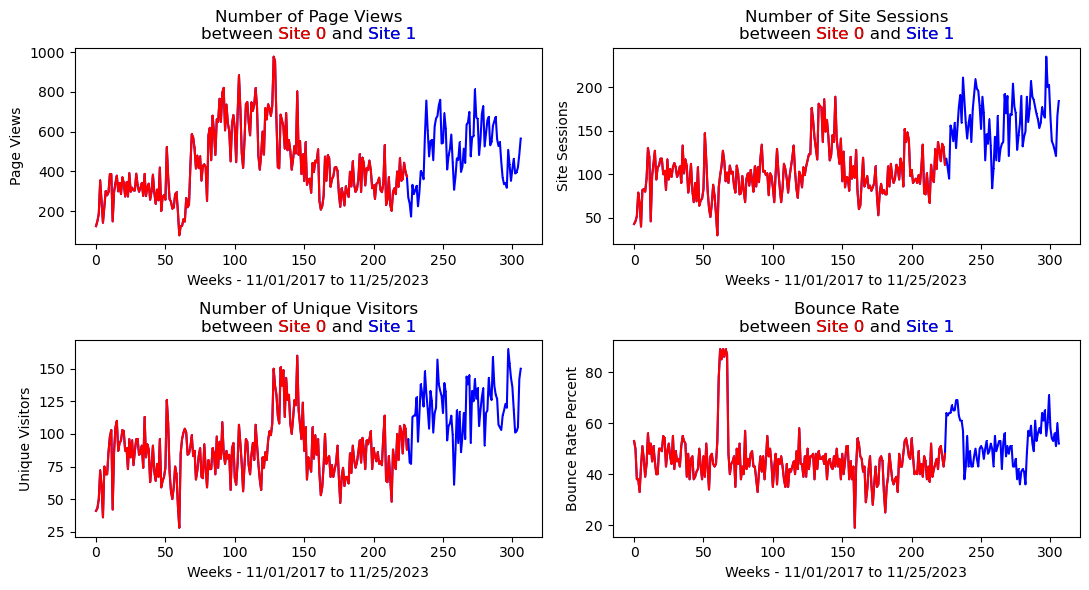

In [10]:
fig3, ax3 = plt.subplots(2, 2, figsize = (11, 6))

ax3[0,0].plot(pv_tr, ',-b')
ax3[0,0].plot(tr0["Page views"], ',-r')
ax3[0,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[0,0].set_ylabel('Page Views')
ax3[0,0].set_title('Number of Page Views\nbetween Site 0 and Site 1')
ax3[0,0].text(148.5, 1052, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[0,0].text(213.5, 1052, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax3[0,1].plot(ss_tr, ',-b')
ax3[0,1].plot(tr0["Site sessions"], ',-r')
ax3[0,1].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[0,1].set_ylabel('Site Sessions')
ax3[0,1].set_title('Number of Site Sessions\nbetween Site 0 and Site 1')
ax3[0,1].text(148.5, 252, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[0,1].text(213.5, 252, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax3[1,0].plot(uv_tr, ',-b')
ax3[1,0].plot(tr0["Unique visitors"], ',-r')
ax3[1,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[1,0].set_ylabel('Unique Visitors')
ax3[1,0].set_title('Number of Unique Visitors\nbetween Site 0 and Site 1')
ax3[1,0].text(148.5, 176, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[1,0].text(213.5, 176, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax3[1,1].plot(br_tr, ',-b')
ax3[1,1].plot(tr0_br, ',-r')
ax3[1,1].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax3[1,1].set_ylabel('Bounce Rate Percent')
ax3[1,1].set_title('Bounce Rate\nbetween Site 0 and Site 1')
ax3[1,1].text(148.5, 94.5, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax3[1,1].text(213.5, 94.5, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

plt.tight_layout()
plt.show()

This function, `convert_seconds(x)`, converts a string like "4m, 58s" into a integer of seconds

In [11]:
def convert_seconds(original_time):
    og_time = original_time
    if og_time == 'nan':
        og_time = '0m, 0s'
    if og_time == 'na':
        og_time = '0m, 0s'
    string_1 = str(og_time)
    string_min = string_1[0:2]
    str_min = string_min.replace("m", "") 

    string_sec = string_1[4:8]
    str_s_sec = string_sec.replace("s", "") 
    str_sec = str_s_sec.replace(" ", "") 

    new_time = int(str_min)*60
    new_time += int(str_sec)
    return new_time

For both "Site 0" & "Site 1" on both `'Avg. session duration'` & `'Avg. time on page'`:
- converts each string in the "pandas.core.series.Series" to a string--> list
- applies each string in the list to the `convert_seconds()` function 
- convert that list into a 'pandas.core.frame.DataFrame'
- convert that back into a 'pandas.core.series.Series'

Then, concatenate both "Site 0" and "Site 1" together 

In [12]:
tr0_list_asd = [str(i) for i in tr0['Avg. session duration']]
tr0_converted_asd = [convert_seconds(x) for x in tr0_list_asd]
tr0_asd_df = pd.DataFrame(tr0_converted_asd)
tr0_asd = tr0_asd_df.squeeze()

In [13]:
tr1_list_asd = [str(i) for i in tr1['Avg. session duration']]
tr1_converted_asd = [convert_seconds(x) for x in tr1['Avg. session duration']]
tr1_asd_df = pd.DataFrame(tr1_converted_asd)
tr1_asd = tr1_asd_df.squeeze()

In [14]:
asd_df = pd.concat([tr0_asd, tr1_asd] , ignore_index = True)
asd_tr = br_df.squeeze()

In [15]:
tr0_list_atop = [str(i) for i in tr0['Avg. time on page']]
tr0_converted_atop = [convert_seconds(x) for x in tr0_list_atop]
tr0_atop_df = pd.DataFrame(tr0_converted_atop)
tr0_atop = tr0_atop_df.squeeze()

In [16]:
tr1_list_atop = [str(i) for i in tr1['Avg. time on page']]
tr1_converted_atop = [convert_seconds(x) for x in tr1['Avg. time on page']]
tr1_atop_df = pd.DataFrame(tr1_converted_atop)
tr1_atop = tr1_atop_df.squeeze()

In [17]:
atop_df = pd.concat([tr0_atop, tr1_atop] , ignore_index = True)
asd_tr = atop_df.squeeze()

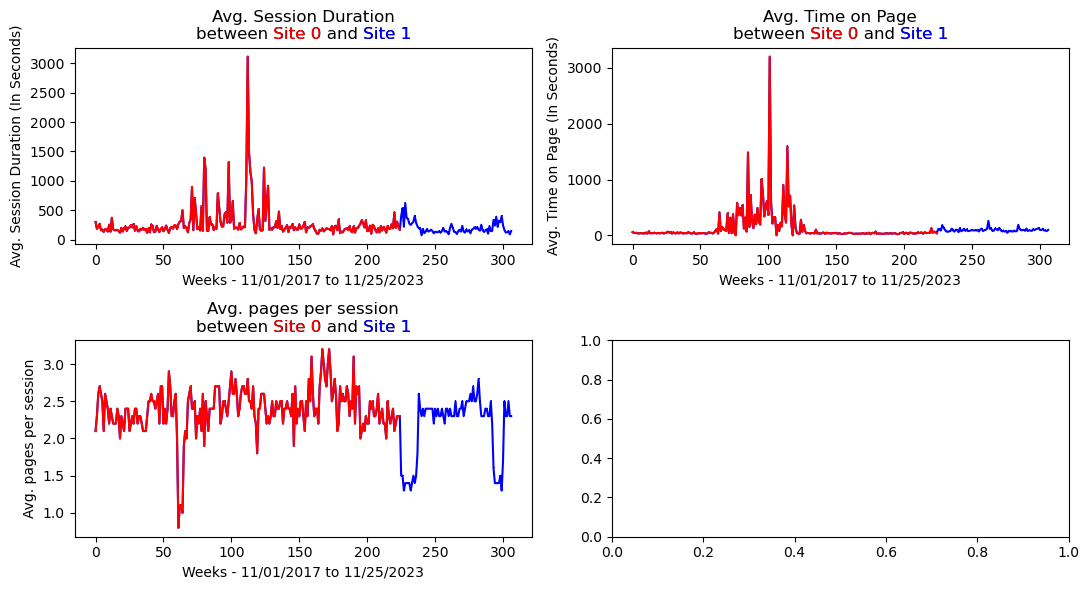

In [18]:
fig4, ax4 = plt.subplots(2, 2, figsize = (11, 6))

ax4[0,0].plot(asd_df, ',-b')
ax4[0,0].plot(tr0_asd, ',-r')
ax4[0,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax4[0,0].set_ylabel('Avg. Session Duration (In Seconds)')
ax4[0,0].set_title('Avg. Session Duration\nbetween Site 0 and Site 1')
ax4[0,0].text(148.5, 3355, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax4[0,0].text(214.5, 3355, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax4[0,1].plot(atop_df, ',-b')
ax4[0,1].plot(tr0_atop, ',-r')
ax4[0,1].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax4[0,1].set_ylabel('Avg. Time on Page (In Seconds)')
ax4[0,1].set_title('Avg. Time on Page\nbetween Site 0 and Site 1')
ax4[0,1].text(148.5, 3470, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax4[0,1].text(214.5, 3470, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

ax4[1,0].plot(apps_tr, ',-b')
ax4[1,0].plot(tr0["Avg. pages per session"], ',-r')
ax4[1,0].set_xlabel('Weeks - 11/01/2017 to 11/25/2023') 
ax4[1,0].set_ylabel('Avg. pages per session')
ax4[1,0].set_title('Avg. pages per session\nbetween Site 0 and Site 1')
ax4[1,0].text(148.5, 3.39, "Site 0", ha="center", va="bottom", size="large",color="red",zorder=10)
ax4[1,0].text(214.5, 3.39, "Site 1", ha="center", va="bottom", size="large",color="blue",zorder=10)

plt.tight_layout()
plt.show()

***
## Conclusion
&emsp;&ensp;From my analysis and visuals, I have learned that between site 0 and site 1: There is an increase in unique visitors and site sessions, but there is a decrease in the number of page views, Average session duration, average time on page, and average pages per session. The audience/employers should focus on the visuals and the growth along with the different numbers between the sites. Additionally, it's very important to remember what the visuals represent. For instance, when I was hired to try and improve the accessibility of information (since the original site had too many navigational pages and menu tabs) showing a decrease in the average pages per session is actually a good thing. It means that I accomplished my goal that I was hired for.